In [ ]:
!pip install -q bert-score rank_bm25

In [ ]:
import pandas as pd
from bert_score import score
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')

In [20]:
df = pd.read_csv("/kaggle/input/llm-responses/sample_100_responses.csv")
df.columns = df.columns.str.strip()


df["GPT_accuracy_BERT"] = 0.0
df["Gemini_accuracy_BERT"] = 0.0
df["GPT_accuracy_BM25"] = 0.0
df["Gemini_accuracy_BM25"] = 0.0



In [ ]:
for idx, row in df.iterrows():
    gt = str(row["output"])
    gpt = str(row["GPT_response"])
    gem = str(row["Gemini_response"])

    # BERTScore
    _, _, gpt_f1 = score([gpt], [gt], lang='en', verbose=False)
    _, _, gem_f1 = score([gem], [gt], lang='en', verbose=False)
    df.at[idx, "GPT_accuracy_BERT"] = gpt_f1.item()
    df.at[idx, "Gemini_accuracy_BERT"] = gem_f1.item()

    # BM25
    gpt_tokens = [word_tokenize(gpt.lower())]
    gem_tokens = [word_tokenize(gem.lower())]
    gt_tokens = word_tokenize(gt.lower())

    bm25_gpt = BM25Okapi(gpt_tokens)
    bm25_gem = BM25Okapi(gem_tokens)

    df.at[idx, "GPT_accuracy_BM25"] = bm25_gpt.get_scores(gt_tokens)[0]
    df.at[idx, "Gemini_accuracy_BM25"] = bm25_gem.get_scores(gt_tokens)[0]




In [9]:
for col in ["GPT_accuracy_BM25", "Gemini_accuracy_BM25"]:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col + "_norm"] = (df[col] - min_val) / (max_val - min_val)

display_cols = ["input", "GPT_response", "Gemini_response", "output",
                "GPT_accuracy_BERT", "Gemini_accuracy_BERT",
                "GPT_accuracy_BM25_norm", "Gemini_accuracy_BM25_norm"]

display_df = df[display_cols].head(10)
display(display_df)

,input,GPT_response,Gemini_response,output,GPT_accuracy_BERT,Gemini_accuracy_BERT,GPT_accuracy_BM25_norm,Gemini_accuracy_BM25_norm
0,"I wake in the night, usually about 2-3 hours a...","Dear Patient, based on your symptoms, here are...","Dear patient, here are potential causes for yo...",Dear patient Here are the possibilities of wha...,0.884404,0.862029,0.602427,0.833833
1,"Honorable Sir,I am Ripon Dev from Bangladesh.M...","Dear Mr. Ripon Dev, thank you for reaching out...","Dear Ripon Dev,\n\nDetailed Kidney Condition: ...","Hi, Thanks for writing in. Please add detailed...",0.843845,0.846192,0.776848,0.839309
2,Ive had a cold which started on Christmas eve ...,"Dear Patient, based on your description, you l...","Dear Patient,\n\nPossible Sinusitis: Symptoms ...","Hi, Welcome to Chat Doctor! Yes, from what you...",0.843803,0.847086,0.619873,0.840724
3,I had cervical laminectomy surgery for spinal ...,"Dear Patient, your description indicates you m...","Dear Patient,\n\nPost-Laminectomy Complication...",Thanks for writing to us. You have complex sto...,0.837646,0.832329,0.715288,0.851373
4,"Hello, At the end of lacrosse practice about a...","Dear Patient, your symptoms strongly suggest a...","Dear Patient,\n\nDeltoid Injury: Direct trauma...","Dear List, I believe you may have suffered a m...",0.846078,0.832192,0.698268,0.768455
5,"Hello Doctor, I have pain in my right shoulder...","Dear Amiya, your current shoulder and neck pai...","Dear Amiya,\n\nShoulder/Neck Pain: Requires ev...",Hi Welcome to Chat Doctor After going through ...,0.824995,0.817228,0.698677,0.824646
6,"Hi Doctor, I am a patient of Psoriasis from La...","Dear Patient, Psoriasis is a chronic autoimmun...","Dear Patient,\n\nPsoriasis Relapse: Recurrence...","Hello, I very well understand your concern for...",0.847346,0.827269,0.576397,0.823839
7,"Hello,I have a friend that just expressed a co...","Dear Patient, your friend's symptoms—pain unde...","Dear Friend,\n\nLeft Ribcage/Back Pain: Could ...",Thanks for your question on Chat Doctor. In my...,0.827022,0.812281,0.598088,0.765010
8,"I had a child April 11. , 2012. 4weeks after ...","Dear Patient, while the Depo-Provera shot is k...","Dear Patient,\n\nPostpartum Depo Shot: Depo-Pr...",Hi and thank you so much for this query. I am ...,0.839626,0.827069,0.603477,0.751878
9,Doc my current husband is thal minor and we ar...,"Dear Patient, since your current husband is Th...","Hi, your husband's thalassemia minor means he ...","Hi, Thanks for writing in. Thalassaemia is cau...",0.870804,0.880080,0.222998,0.539845


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


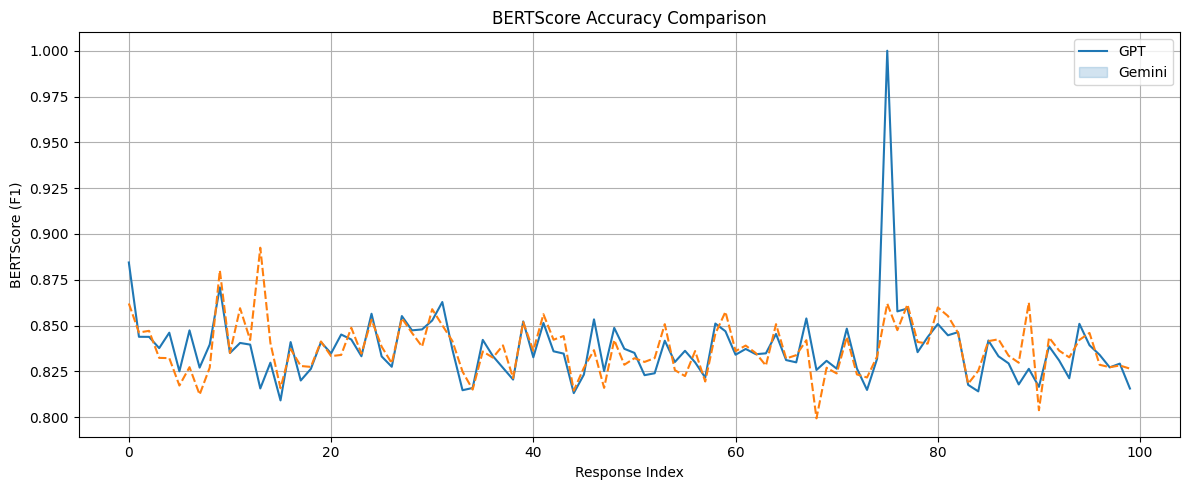

In [6]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df[["GPT_accuracy_BERT", "Gemini_accuracy_BERT"]])
plt.title("BERTScore Accuracy Comparison")
plt.ylabel("BERTScore (F1)")
plt.xlabel("Response Index")
plt.legend(["GPT", "Gemini"])
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


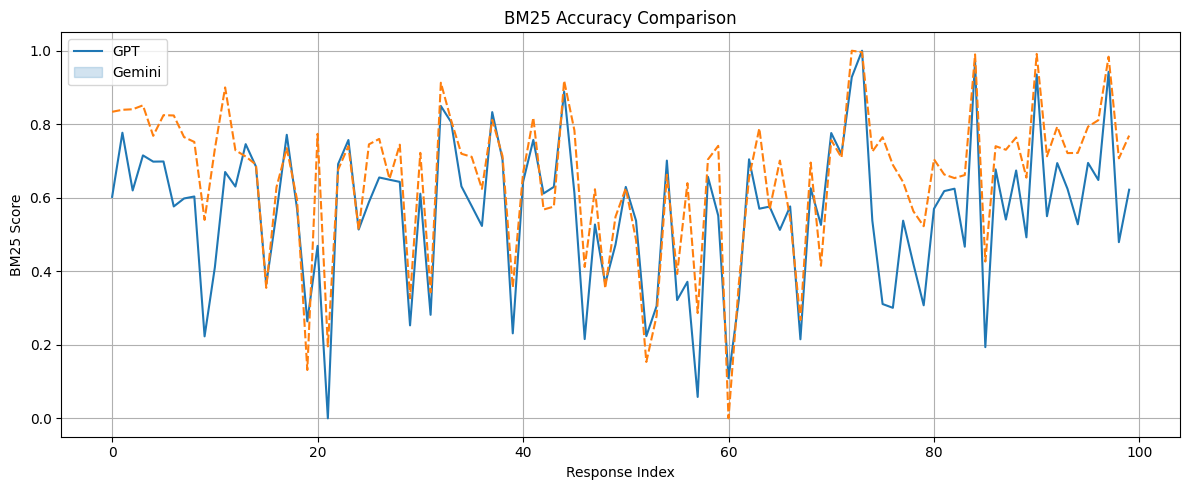

In [10]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df[["GPT_accuracy_BM25_norm", "Gemini_accuracy_BM25_norm"]])
plt.title("BM25 Accuracy Comparison")
plt.ylabel("BM25 Score")
plt.xlabel("Response Index")
plt.legend(["GPT", "Gemini"])
plt.grid(True)
plt.tight_layout()
plt.show()

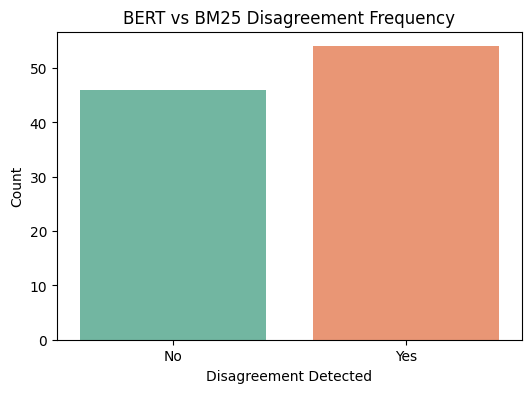

In [12]:
#  Flag Disagreement between metrics
df["Disagreement"] = df.apply(
    lambda row: (
        (row["GPT_accuracy_BERT"] > row["Gemini_accuracy_BERT"] and row["GPT_accuracy_BM25_norm"] < row["Gemini_accuracy_BM25_norm"]) or
        (row["GPT_accuracy_BERT"] < row["Gemini_accuracy_BERT"] and row["GPT_accuracy_BM25_norm"] > row["Gemini_accuracy_BM25_norm"])
    ),
    axis=1
)

#  Visualization – Disagreement Flag
plt.figure(figsize=(6, 4))
sns.countplot(x="Disagreement", data=df, palette="Set2")
plt.title("BERT vs BM25 Disagreement Frequency")
plt.xlabel("Disagreement Detected")
plt.ylabel("Count")
plt.xticks([0, 1], ["No", "Yes"])
plt.show()

,GPT_accuracy_BERT,Gemini_accuracy_BERT,GPT_accuracy_BM25_norm,Gemini_accuracy_BM25_norm,GPT_hybrid_score,Gemini_hybrid_score,Winner,Disagreement
0,0.884404,0.862029,0.602427,0.833833,0.743415,0.847931,Gemini,True
1,0.843845,0.846192,0.776848,0.839309,0.810346,0.842751,Gemini,False
2,0.843803,0.847086,0.619873,0.840724,0.731838,0.843905,Gemini,False
3,0.837646,0.832329,0.715288,0.851373,0.776467,0.841851,Gemini,True
4,0.846078,0.832192,0.698268,0.768455,0.772173,0.800324,Gemini,True
5,0.824995,0.817228,0.698677,0.824646,0.761836,0.820937,Gemini,True
6,0.847346,0.827269,0.576397,0.823839,0.711871,0.825554,Gemini,True
7,0.827022,0.812281,0.598088,0.765010,0.712555,0.788645,Gemini,True
8,0.839626,0.827069,0.603477,0.751878,0.721551,0.789474,Gemini,True
9,0.870804,0.880080,0.222998,0.539845,0.546901,0.709963,Gemini,False


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


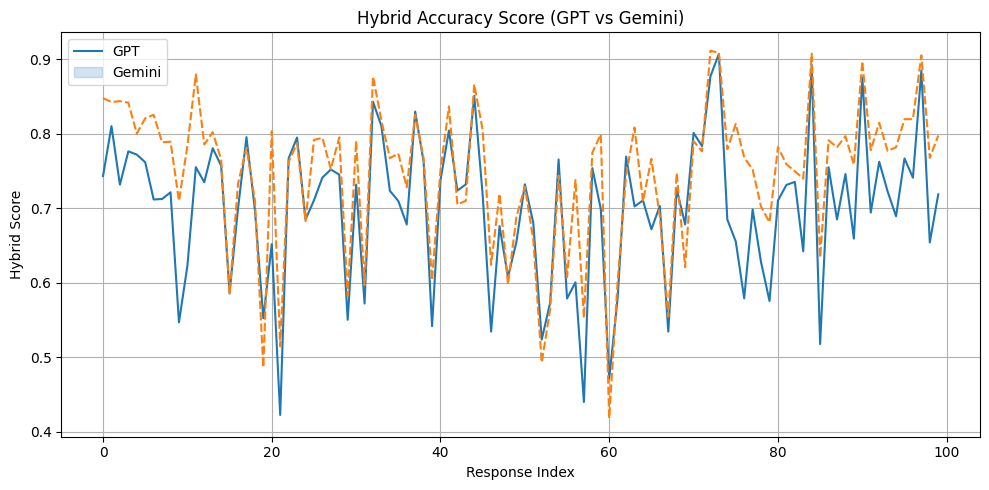

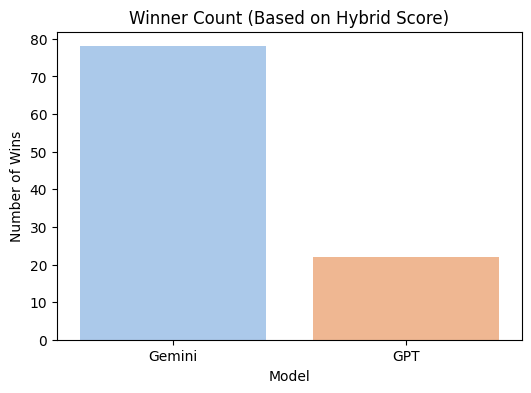

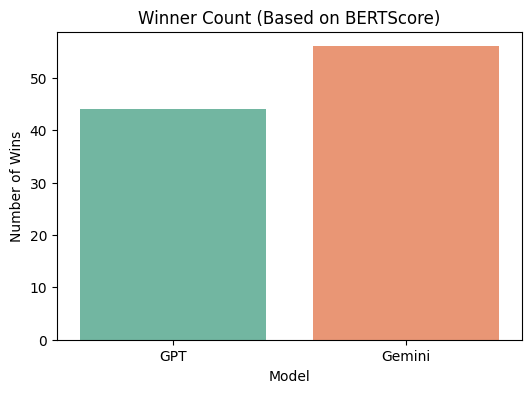

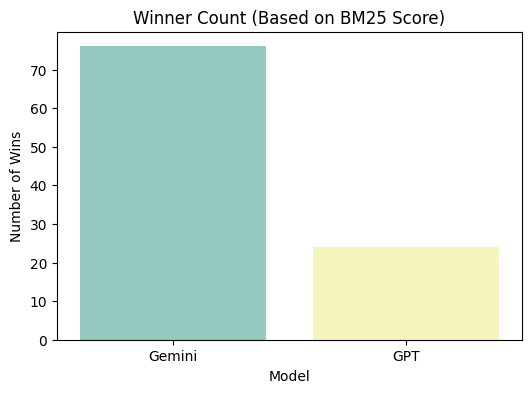

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Calculate Hybrid Score = average of BERT + normalized BM25
df["GPT_hybrid_score"] = (df["GPT_accuracy_BERT"] + df["GPT_accuracy_BM25_norm"]) / 2
df["Gemini_hybrid_score"] = (df["Gemini_accuracy_BERT"] + df["Gemini_accuracy_BM25_norm"]) / 2

#  Determine Winner
df["Winner"] = df.apply(
    lambda row: "GPT" if row["GPT_hybrid_score"] > row["Gemini_hybrid_score"] else
                "Gemini" if row["Gemini_hybrid_score"] > row["GPT_hybrid_score"] else
                "Tie",
    axis=1
)

# Winner Based on BERT Score
df["Winner_BERT"] = df.apply(
    lambda row: "GPT" if row["GPT_accuracy_BERT"] > row["Gemini_accuracy_BERT"] else
                "Gemini" if row["Gemini_accuracy_BERT"] > row["GPT_accuracy_BERT"] else
                "Tie",
    axis=1
)

# Winner Based on BM25 Score (normalized)
df["Winner_BM25"] = df.apply(
    lambda row: "GPT" if row["GPT_accuracy_BM25_norm"] > row["Gemini_accuracy_BM25_norm"] else
                "Gemini" if row["Gemini_accuracy_BM25_norm"] > row["GPT_accuracy_BM25_norm"] else
                "Tie",
    axis=1
)

# SDisplay first few results
display_cols = [
    "GPT_accuracy_BERT", "Gemini_accuracy_BERT",
    "GPT_accuracy_BM25_norm", "Gemini_accuracy_BM25_norm",
    "GPT_hybrid_score", "Gemini_hybrid_score",
    "Winner", "Disagreement"
]
from IPython.display import display
display(df[display_cols].head(10))

# Visualization – Hybrid Score Comparison
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[["GPT_hybrid_score", "Gemini_hybrid_score"]])
plt.title("Hybrid Accuracy Score (GPT vs Gemini)")
plt.ylabel("Hybrid Score")
plt.xlabel("Response Index")
plt.legend(["GPT", "Gemini"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualization – Winner Count
plt.figure(figsize=(6, 4))
sns.countplot(x="Winner", data=df, palette="pastel")
plt.title("Winner Count (Based on Hybrid Score)")
plt.ylabel("Number of Wins")
plt.xlabel("Model")
plt.show()

# Visualization – Winner Count (Based on BERT)
plt.figure(figsize=(6, 4))
sns.countplot(x="Winner_BERT", data=df, palette="Set2")
plt.title("Winner Count (Based on BERTScore)")
plt.ylabel("Number of Wins")
plt.xlabel("Model")
plt.show()

# Visualization – Winner Count (Based on BM25)
plt.figure(figsize=(6, 4))
sns.countplot(x="Winner_BM25", data=df, palette="Set3")
plt.title("Winner Count (Based on BM25 Score)")
plt.ylabel("Number of Wins")
plt.xlabel("Model")
plt.show()



In [15]:
#Relevance


!pip install -q sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')


# Encode inputs and responses
inputs = df['input'].astype(str).tolist()
gpt_responses = df['GPT_response'].astype(str).tolist()
gemini_responses = df['Gemini_response'].astype(str).tolist()

input_embeddings = model.encode(inputs, convert_to_tensor=True)
gpt_embeddings = model.encode(gpt_responses, convert_to_tensor=True)
gemini_embeddings = model.encode(gemini_responses, convert_to_tensor=True)

# Compute cosine similarities
gpt_sim = util.cos_sim(input_embeddings, gpt_embeddings).diagonal()
gemini_sim = util.cos_sim(input_embeddings, gemini_embeddings).diagonal()

# Add relevance scores
df["GPT_relevance_score"] = gpt_sim.cpu().numpy()
df["Gemini_relevance_score"] = gemini_sim.cpu().numpy()


In [18]:
# Determine winner based on relevance
df["Winner_Relevance"] = df.apply(
    lambda row: "GPT" if row["GPT_relevance_score"] > row["Gemini_relevance_score"] else
                "Gemini" if row["Gemini_relevance_score"] > row["GPT_relevance_score"] else
                "Tie",
    axis=1
)

# Show first few rows
from IPython.display import display
display(df[["input", "GPT_relevance_score", "Gemini_relevance_score", "Winner_Relevance"]].head(10))


,input,GPT_relevance_score,Gemini_relevance_score,Winner_Relevance
0,"I wake in the night, usually about 2-3 hours a...",0.648044,0.295900,GPT
1,"Honorable Sir,I am Ripon Dev from Bangladesh.M...",0.691713,0.587648,GPT
2,Ive had a cold which started on Christmas eve ...,0.750663,0.690178,GPT
3,I had cervical laminectomy surgery for spinal ...,0.736780,0.726236,GPT
4,"Hello, At the end of lacrosse practice about a...",0.682298,0.551973,GPT
5,"Hello Doctor, I have pain in my right shoulder...",0.737348,0.705861,GPT
6,"Hi Doctor, I am a patient of Psoriasis from La...",0.792285,0.747678,GPT
7,"Hello,I have a friend that just expressed a co...",0.826838,0.766296,GPT
8,"I had a child April 11. , 2012. 4weeks after ...",0.825367,0.734348,GPT
9,Doc my current husband is thal minor and we ar...,0.705331,0.643842,GPT


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


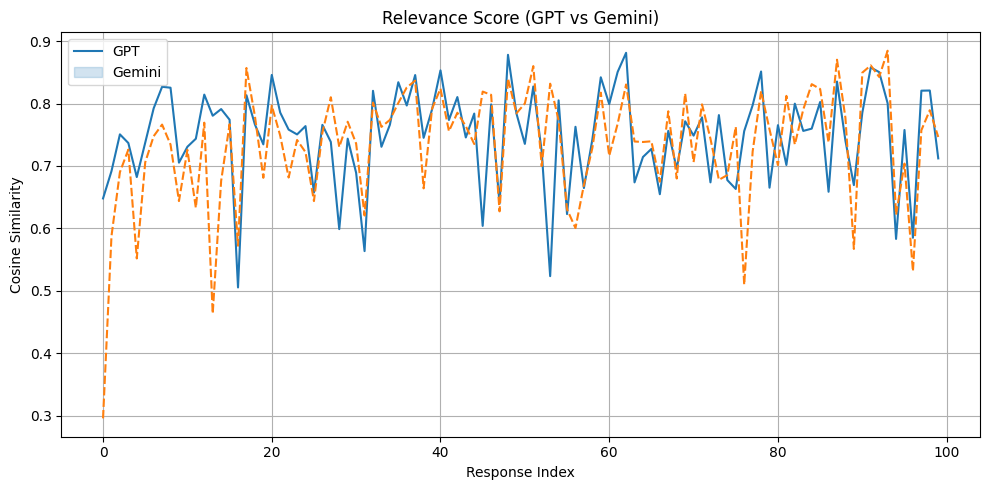

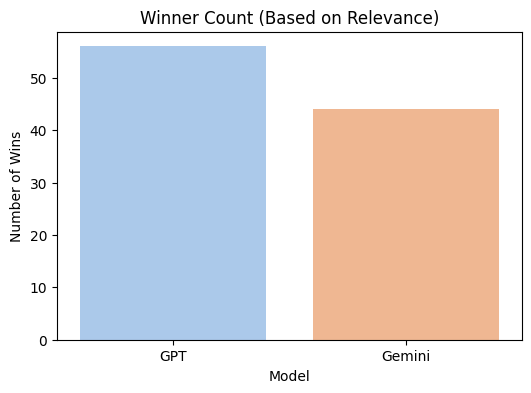

In [19]:
# Line plot of relevance scores
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[["GPT_relevance_score", "Gemini_relevance_score"]])
plt.title("Relevance Score (GPT vs Gemini)")
plt.ylabel("Cosine Similarity")
plt.xlabel("Response Index")
plt.legend(["GPT", "Gemini"])
plt.grid(True)
plt.tight_layout()
plt.show()

# Winner count
plt.figure(figsize=(6, 4))
sns.countplot(x="Winner_Relevance", data=df, palette="pastel")
plt.title("Winner Count (Based on Relevance)")
plt.ylabel("Number of Wins")
plt.xlabel("Model")
plt.show()
